# Task 3: Exploratory Data Analysis (EDA)

# A) EDA for IRIS Dataset

# 1️⃣ Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2️⃣ Load Iris Dataset

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species'] = df_iris['species'].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})

df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 3️⃣ Histograms (Numerical Features)

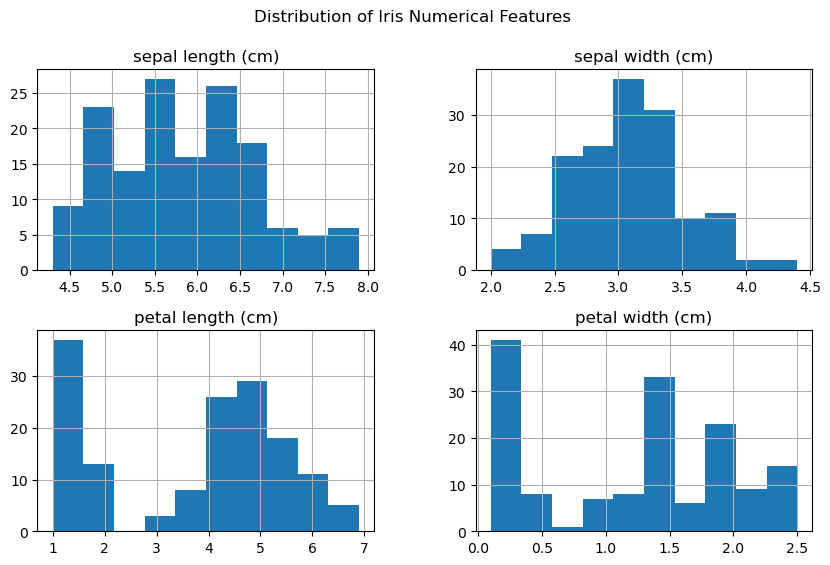

In [10]:
df_iris.hist(figsize=(10,6))
plt.suptitle("Distribution of Iris Numerical Features")
plt.show()


# 4️⃣ Count Plot (Categorical Feature)

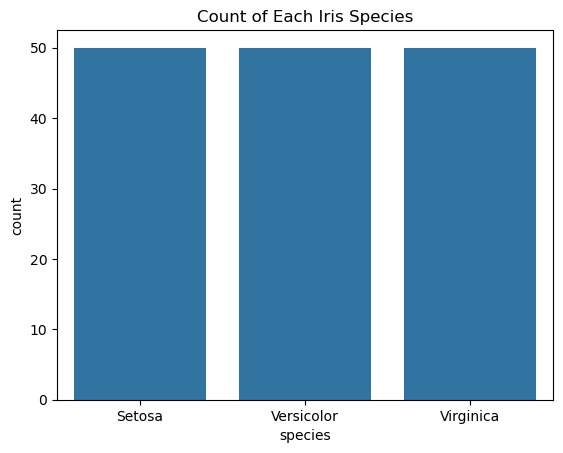

In [13]:
sns.countplot(x='species', data=df_iris)
plt.title("Count of Each Iris Species")
plt.show()


# 5️⃣ Box Plots (Outliers Detection)

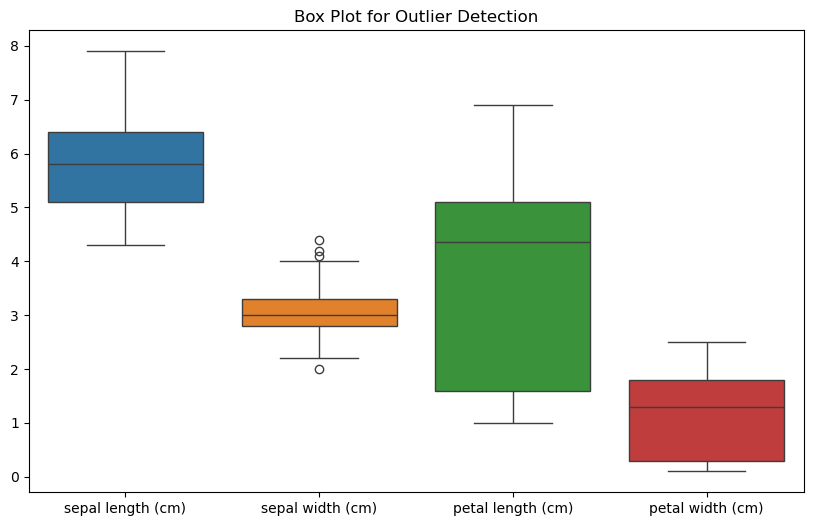

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_iris.drop('species', axis=1))
plt.title("Box Plot for Outlier Detection")
plt.show()


# 6️⃣ Correlation Heatmap

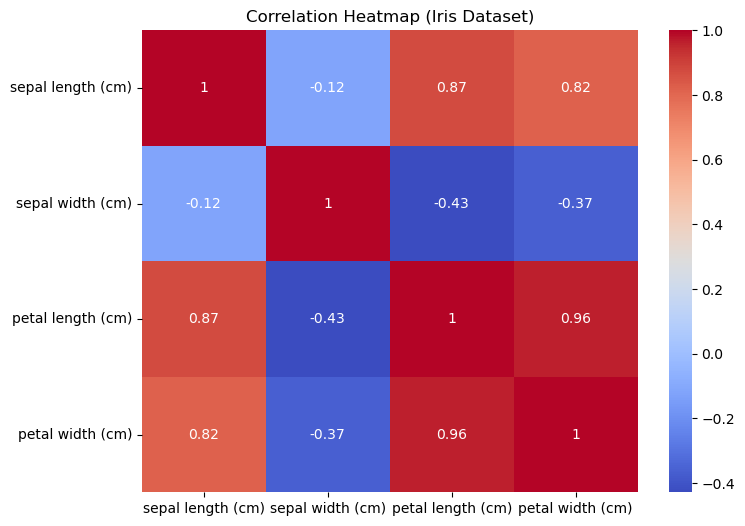

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df_iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Iris Dataset)")
plt.show()


# 7️⃣ Important Features for Prediction (Iris)

# B) EDA for Netflix Movies and TV Shows Dataset

# 1️⃣ Load Dataset

In [27]:
df_netflix = pd.read_csv("netflix_titles.csv")
df_netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 2️⃣ Dataset Info

In [30]:
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 3️⃣ Count Plot for Type (Movie / TV Show)

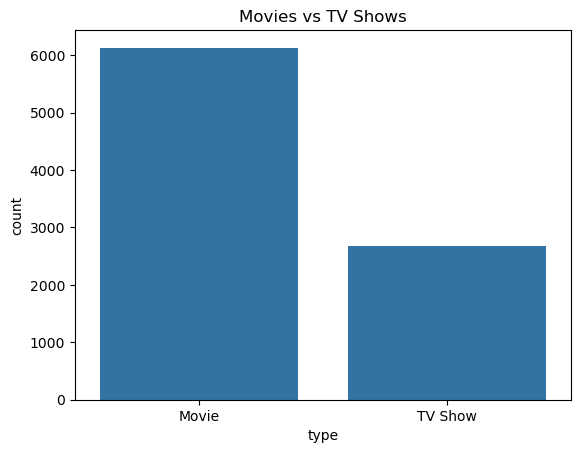

In [33]:
sns.countplot(x='type', data=df_netflix)
plt.title("Movies vs TV Shows")
plt.show()


# 4️⃣ Top Countries Producing Content

df_netflix['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Content")
plt.show()


# 5️⃣ Distribution of Release Years

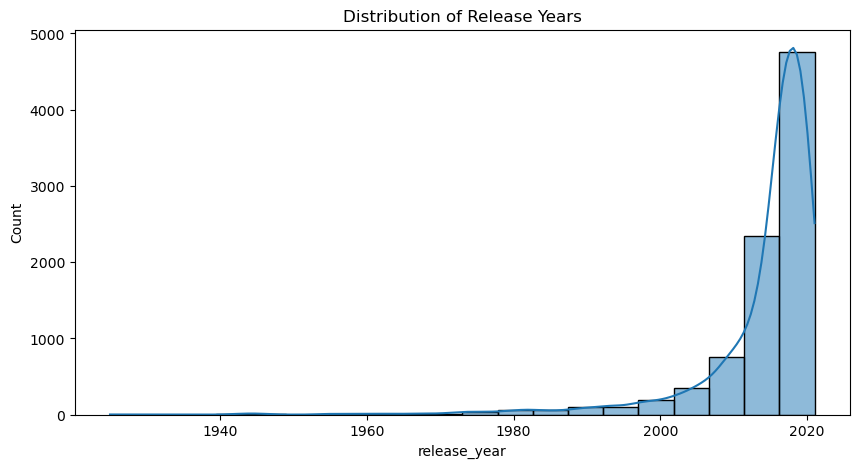

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df_netflix['release_year'], bins=20, kde=True)
plt.title("Distribution of Release Years")
plt.show()


# 6️⃣ Content Ratings Count

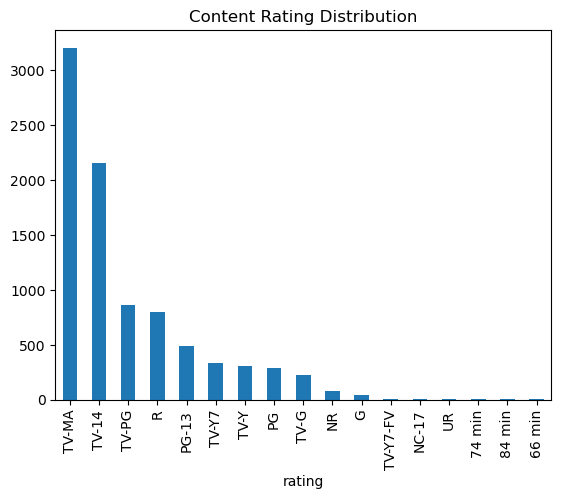

In [42]:
df_netflix['rating'].value_counts().plot(kind='bar')
plt.title("Content Rating Distribution")
plt.show()


# 7️⃣ Box Plot for Movie Duration

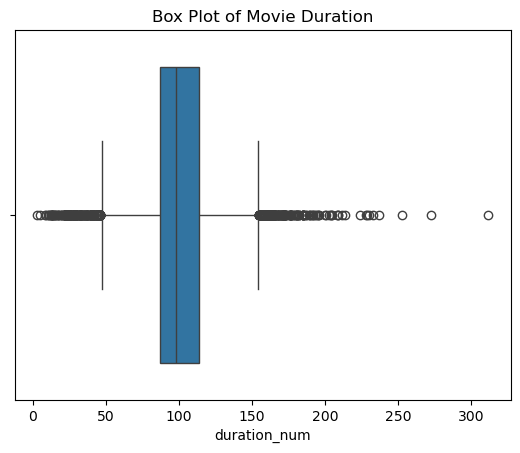

In [47]:
df_movies = df_netflix[df_netflix['type'] == 'Movie'].copy()

df_movies['duration_num'] = df_movies['duration'].str.replace(' min','').astype(float)

sns.boxplot(x=df_movies['duration_num'])
plt.title("Box Plot of Movie Duration")
plt.show()


# 8️⃣ Correlation Heatmap (Numeric Only)

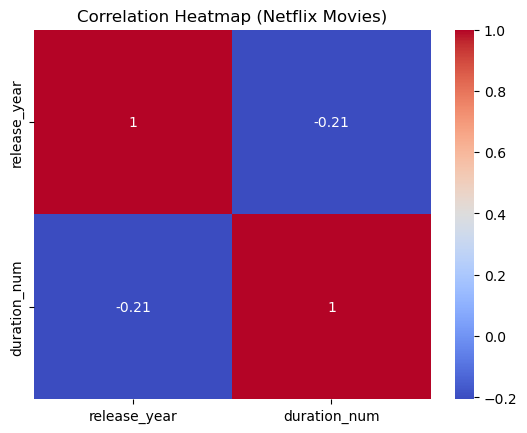

In [50]:
numeric_df = df_movies[['release_year','duration_num']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Netflix Movies)")
plt.show()
